In [247]:
import pandas as pd 
import numpy as np 
import matplotlib as mpt
import seaborn as sns
import datetime as dt 
import warnings
import os
import sklearn as skl
import matplotlib.pyplot as plt

data = pd.read_excel("Bureau/AURORA/Data-Former.xlsx", skiprows = range(5)).set_index('Dates')
data_pct = pd.read_excel('Bureau/AURORA/Data-StdPct.xlsx', skiprows= range(4)).set_index('Dates')
data_pct = data_pct.iloc[:,1:]
data_fold = [data, data_pct]
features = ['prices', 'vol', 'skewness', 'kurtosis', 'correl']
asset = ['eq','bds']
for _ in data_fold:
    _.rename(columns = lambda x: x.lower(), inplace=True)
    
data['eq,returns,all'] = data['eq,prices,all'].pct_change()
data['bds,returns,all'] = data['bds,prices,all'].pct_change()
print('\nData fields: ', list(data.columns))
print('\nData_pct fields: ', list(data_pct.columns))

### Reminder - Select columns with regex
#data.filter(regex = '^[beginning of columns you want]', axis=1)
#data.filter(regex = '[end of what you want]$', axis=1)
#data.filter(like = '[contains]', axis=1)
# Inverse regex (does not contain) = ^((?![to_exclude]).)*$


Data fields:  ['eq,prices,all', 'bds,prices,all', 'eq,vol,5', 'eq,vol,10', 'eq,vol,21', 'eq,vol,42', 'eq,vol,63', 'eq,vol,126', 'eq,vol,252', 'eq,vol,512', 'bds,vol,5', 'bds,vol,10', 'bds,vol,21', 'bds,vol,42', 'bds,vol,63', 'bds,vol,126', 'bds,vol,252', 'bds,vol,512', 'all,correl,2w', 'all,correl,1m', 'all,correl,2m', 'all,correl,3m', 'all,correl,6m', 'all,correl,1y', 'all,correl,3y', 'all,correl,5y', 'eq,trendiness,2w', 'eq,trendiness,1m', 'eq,trendiness,2m', 'eq,trendiness,3m', 'eq,trendiness,6m', 'eq,trendiness,1y', 'eq,trendiness,3y', 'eq,trendiness,5y', 'bds,trendiness,2w', 'bds,trendiness,1m', 'bds,trendiness,2m', 'bds,trendiness,3m', 'bds,trendiness,6m', 'bds,trendiness,1y', 'bds,trendiness,3y', 'bds,trendiness,5y', 'eq,skewness,3m', 'eq,skewness,6m', 'eq,skewness,1y', 'eq,skewness,3y', 'eq,skewness,5y', 'bds,skewness,3m', 'bds,skewness,6m', 'bds,skewness,1y', 'bds,skewness,3y', 'bds,skewness,5y', 'eq,kurtosis,3m', 'eq,kurtosis,6m', 'eq,kurtosis,1y', 'eq,kurtosis,3y', 'eq,kurt

-- SUMMARY STATS --
Original Dset size (15110, 64) 



,"eq,vol,5","eq,vol,10","eq,vol,21","eq,vol,42","eq,vol,63","eq,vol,126","eq,vol,252","eq,vol,512","bds,vol,5","bds,vol,10","bds,vol,21","bds,vol,42","bds,vol,63","bds,vol,126","bds,vol,252","bds,vol,512"
count,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000
mean,13.399941,13.642787,13.886267,14.119131,14.258169,14.489514,14.686047,14.711638,5.799660,5.891400,5.965732,6.023137,6.052937,6.099452,6.132317,6.117967
std,8.127178,7.710489,7.253535,6.763218,6.434149,5.790494,5.060286,4.433446,3.329165,3.161745,3.013340,2.886033,2.813541,2.686410,2.558773,2.449977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.586158,9.082186,9.530012,9.881928,10.068947,10.550112,11.351783,12.080678,3.737346,3.958671,4.127602,4.249265,4.309860,4.455249,4.767397,4.822977
50%,11.495369,11.870643,12.227557,12.451559,12.826868,13.438898,13.710127,14.168526,5.165517,5.360114,5.502096,5.648795,5.740498,5.747544,5.792000,6.026117
75%,15.895698,16.070864,16.240391,16.601508,16.739874,16.636016,17.156586,17.228161,7.137072,7.136090,7.141343,7.120623,7.094493,7.118087,7.101451,7.472792
max,122.541337,93.700674,70.010640,59.951910,53.215911,42.324350,34.248382,27.712586,28.131761,23.781421,20.278428,17.835911,16.845345,15.047188,13.349096,11.727943


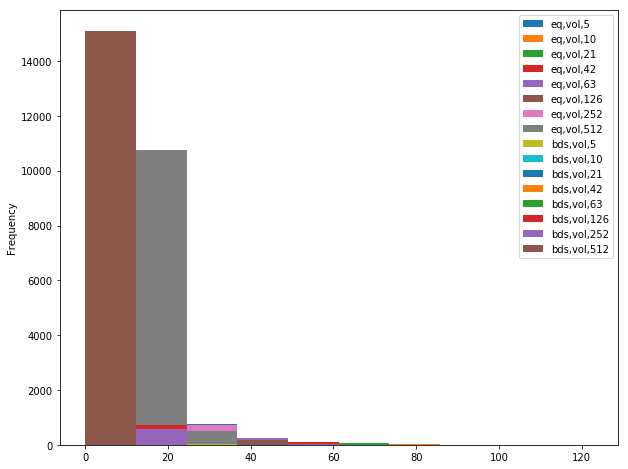

In [248]:
### Quick EDA
# Rq1: sur les max eq- 75% à environ 16% across half lives, mais par contre max à 122, 93, 70, 59, 53, 42...
# Sur les bonds on est plus à 5% across half lives avec rien de fou niveau max 
# Rq2: de la vol à 0? 
print('-- SUMMARY STATS --')
print('Original Dset size', data.shape, '\n')
data.filter(like = 'vol', axis=1).plot(kind = 'hist', figsize = (10,8))
data.filter(like = 'vol', axis=1).describe()

In [249]:
print('Normalized Dset Size', data_pct.shape, '\n')
data_pct.describe()

Normalized Dset Size (14067, 39) 



,"eq, prices, all","bds, prices, all","eq,vol,5","eq,vol,10","eq,vol,21","eq,vol,42","eq,vol,63","eq,vol,126","eq,vol,252","eq,vol,average",...,"eq,trendiness,6m","eq,trendiness,1y","eq,trendiness,average","bds,trendiness,2w","bds,trendiness,1m","bds,trendiness,2m","bds,trendiness,3m","bds,trendiness,6m","bds,trendiness,1y","bds,trendiness,average"
count,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,...,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000
mean,110.237290,162.446362,0.215041,0.232756,0.250105,0.273542,0.290116,0.327075,0.396082,0.283531,...,-0.083125,-0.056146,-0.078562,-0.110865,-0.105083,-0.098458,-0.089332,-0.073569,-0.076399,-0.092284
std,53.836489,82.992285,0.548010,0.537847,0.529025,0.523660,0.520715,0.512464,0.479751,0.481028,...,0.563327,0.557215,0.328038,0.536324,0.543863,0.543522,0.548921,0.546168,0.518989,0.322770
min,38.695139,57.927717,-1.000000,-0.984000,-0.972000,-0.960000,-0.956000,-0.894000,-1.000000,-0.902571,...,-1.000000,-1.000000,-0.865000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.870667
25%,67.795583,90.081025,-0.216000,-0.182000,-0.160000,-0.132000,-0.126000,-0.076000,0.071000,-0.058571,...,-0.566000,-0.536000,-0.324167,-0.573000,-0.574000,-0.563000,-0.562000,-0.536000,-0.502000,-0.331667
50%,96.262703,144.310481,0.292000,0.302000,0.314000,0.362000,0.390000,0.438000,0.512000,0.346000,...,-0.122000,-0.056000,-0.123000,-0.134000,-0.134000,-0.126000,-0.122000,-0.084000,-0.082000,-0.140000
75%,136.032812,213.119387,0.704000,0.718000,0.730000,0.738000,0.746000,0.782000,0.808000,0.694000,...,0.384000,0.380000,0.134333,0.336000,0.342000,0.340000,0.374000,0.376000,0.344000,0.099667
max,291.671262,357.339312,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.984000,0.972000,0.998000,1.000000,1.000000,1.000000,1.000000,0.960333


Showing what? (beginning, all features, timeframe) beginning
Choice? tuple format: eq/bds, vol... eq,returns


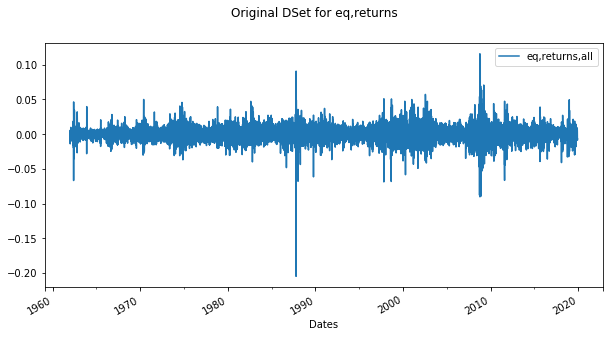

In [252]:
# Plot stuff
show = input('Showing what? (beginning, all features, timeframe)')
if show == 'beginning':
    show = input('Choice? tuple format: eq/bds, vol...')
    data.filter(regex = '^'+show, axis= 1).plot(subplots= True, figsize = (10,5))
    plt.suptitle('Original DSet for ' + show)
    try: 
        data_pct.filter(regex = '^'+show,axis = 1).plot(subplots = True, figsize = (10,5))
        plt.suptitle('Normalized DSet for '+show+' - from Tarek')
    except TypeError: 
        pass
    
elif show == 'features':
    for _ in features: 
        data.filter(like = _, axis= 1).plot(subplots= True, figsize = (10,5))
        plt.suptitle('Original DSet for ' + _)
        try: 
            data_pct.filter(like = _,axis = 1).plot(subplots = True, figsize = (10,5))
            plt.suptitle('Normalized DSet for '+_+' - from Tarek')
        except TypeError:
            pass
elif show == 'timeframe':
    show = input('Choice?')
    data.filter(regex = show+'$', axis= 1).plot(subplots= True, figsize = (10,5))
    plt.suptitle('Original DSet for ' + show)
    try:
        data_pct.filter(regex = show+'$',axis = 1).plot(subplots = True, figsize = (10,5))
        plt.suptitle('Normalized DSet for '+ show +' - from Tarek')
    except TypeError:
        pass
else:
    pass

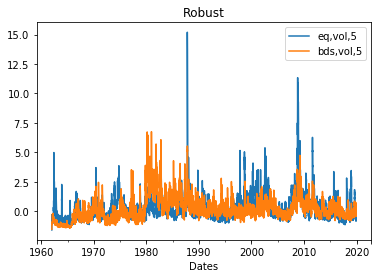

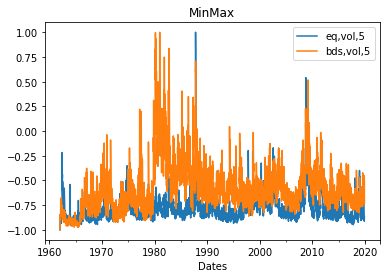

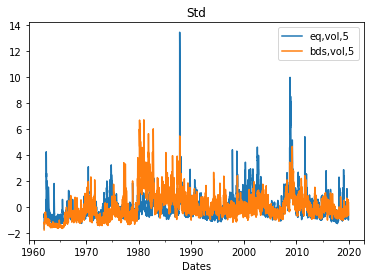

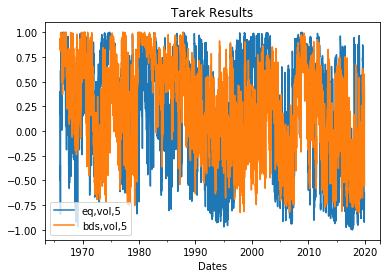

In [301]:
### Multiple Datasets for normalization 
# We could standardize with StandardScaler but data isn't normal 
# MinMax: sensitive to outliers, but try anyway. 
# RobustScaler: robust to outliers (removes median and scales data according to quantile ranges)
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
# Robust Scaler = scaling using median and quantiles - substracts the median to all obs then divide by the interquartile differences (75th - 25th) 

#On prévoit 3 datasets concurrents: 
#- Rescaling everywhere avec minmax 
#- Percentile + rescaling
#- Windsor + rescaling

from sklearn.preprocessing import MinMaxScaler #minmax so that absolute values belong to [0:1]
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler 

norm = {}
correl_data = data.loc[:,'all,correl,1m':'all,correl,5y'].copy()
others_col = data.filter(regex='returns|vol|trendiness').columns
to_normalize = data.loc[:,others_col].copy()
to_normalize_col = to_normalize.columns
norm['MinMax'] = pd.DataFrame(MinMaxScaler(feature_range=(-1,1)).fit_transform(to_normalize), columns = to_normalize_col, index = data.index)
norm['Robust'] = pd.DataFrame(RobustScaler().fit_transform(to_normalize), columns = to_normalize_col, index=data.index)
norm['StandardScaler'] = pd.DataFrame(StandardScaler().fit_transform(to_normalize), columns = to_normalize_col, index = data.index)

#Puis sortir les mats sur la période actuelle: on splitte le dataset original en 4 avec périodes de 15 ans. Peut prendre 20 ans pour la première. 

norm['Robust'].filter(regex='vol,5$', axis=1).plot(kind = 'line', title='Robust')
norm['MinMax'].filter(regex = 'vol,5$', axis=1).plot(kind = 'line', title= 'MinMax')
norm['StandardScaler'].filter(regex='vol,5$', axis=1).plot(kind='line',title='Std')
data_pct.filter(like = 'vol,5', axis=1).plot(kind='line',title='Tarek Results')


In [216]:
### PostNormalization : Post normalization: faire tourner des ACPs statiques sur des subsets de features avec lookback periods similaires, storer les résultats 
#(eigenvectors, values, variances expliquées) puis représentation des données dans un espace factoriel approprié 
